In [32]:
import os 
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns

network_param_scenarios = ["Baseline (20 % Discount)", "33 % Discount"]
surge_scenarios = ["wind", "solar", "wind+solar"]

title_size = 16
ax_size=14

n_days = 10
main_save_dir = f"./surge_results_{n_days}"

univariate_surge = [0.1, 0.5, 0.7, 1.0, 1.2, 1.7, 2.0]

bivariate_surge = itertools.product([1.2, 1.5, 3.0], [0.1, 0.3, 0.7])

all_data = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
#         save_dir = f"{main_save_dir}/{network_param_scenario}/{scenario}"
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        surge_data = pd.read_csv(f"{save_dir}/results.csv", index_col=0)
        all_data.append(surge_data)
surge_res = pd.concat(all_data)

In [16]:
surge_res

,Optimum,Solar Surge Factor,Wind Surge Factor,Network Parameter Scenario,Surge Scenario
0,310.344828,1.0,0.1,Baseline (20 % Discount),wind
1,347.000000,1.0,0.5,Baseline (20 % Discount),wind
2,385.000000,1.0,0.7,Baseline (20 % Discount),wind
3,431.000000,1.0,1.0,Baseline (20 % Discount),wind
4,441.000000,1.0,1.2,Baseline (20 % Discount),wind
5,344.827586,1.0,1.7,Baseline (20 % Discount),wind
6,321.000000,1.0,2.0,Baseline (20 % Discount),wind
0,583.000000,1.0,0.1,33 % Discount,wind
1,634.000000,1.0,0.5,33 % Discount,wind
2,691.000000,1.0,0.7,33 % Discount,wind


Text(0, 0.5, 'Opt Num Batteries')

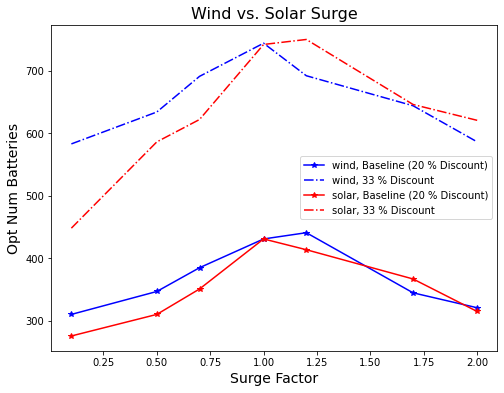

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
for surge_scenario in ["wind", "solar"]: 
    for network_scenario in network_param_scenarios: 
        sub_df = surge_res.loc[surge_res["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        opt = list(sub_df["Optimum"])
        if surge_scenario == "wind": 
            color = "blue"
        else: color = "red"
        if "Baseline" in network_scenario:
            symbol = '-*'
        else: symbol = "-."
        ax.plot(univariate_surge, opt,symbol,color=color,label=f"{surge_scenario}, {network_scenario}")
ax.legend()
ax.set_title(f"Wind vs. Solar Surge",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Opt Num Batteries",fontsize=ax_size)

In [ ]:
# surge_scenarios = surge_scenarios = ["wind", "solar"]
# feature_types = ["FBK", "MFCC"]

# fig, axes = plt.subplots(1, 3, figsize=(14,6))
# fig.suptitle(f"Interaction of Feature Type and Context Width", fontsize=title_size + 3)

# ctxt_widths = sorted(set(ctxt_df["Context Width"]))

# for idx, coeff in enumerate(coefficients):
#     ax = axes[idx]
#     for feature_type in feature_types: 
#         rep_name = f"{feature_type} {coeff}"
#         show_df = ctxt_df.loc[ctxt_df["Feature Type"] == rep_name]
        
#         if feature_type == "FBK":
#             test_color = "red"
#             train_color = "orange"
#         else: 
#             test_color = "blue"
#             train_color = "green"
        
#         test_err = show_df.loc[show_df["Evaluation Data"] == "Testing Set"][err_label]
#         ax.plot(ctxt_widths, test_err,'-*',color=test_color,label=f"{feature_type} (Test)")
        
#         train_err = show_df.loc[show_df["Evaluation Data"] == "Training Set"][err_label]
#         ax.plot(ctxt_widths, train_err,'-.',color=train_color,label=f"{feature_type} (Train)")

#         ax.legend(loc="upper right")
        
#         ax.set_title(f"{coeff} Coefficients",fontsize=title_size) 
#         ax.set_xlabel("Context Width",fontsize=ax_size)
#         ax.set_ylabel(err_label,fontsize=ax_size)
        
# plt.savefig(f"{output_dir}ctxt_features.png", dpi=400, bbox_inches="tight")      

In [35]:
n_days = 30
main_save_dir = f"./surge_results_{n_days}"

all_data = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
#         save_dir = f"{main_save_dir}/{network_param_scenario}/{scenario}"
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        data_file_pth= f"{save_dir}/results.csv"
        if os.path.exists(data_file_pth):
            surge_data = pd.read_csv(data_file_pth, index_col=0)
            all_data.append(surge_data)
surge_res_30 = pd.concat(all_data)

Text(0, 0.5, 'Opt Num Batteries')

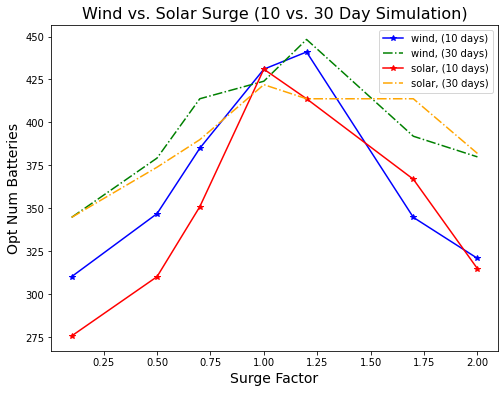

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
network_scenario = "Baseline (20 % Discount)"
for surge_scenario in ["wind", "solar"]: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        opt = list(sub_df["Optimum"])
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "green"
        else: 
            if n_days == 10: 
                color = "red"
            else: color = "orange"
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
        ax.plot(univariate_surge, opt,symbol,color=color,label=f"{surge_scenario}, ({n_days} days)")
ax.legend()
ax.set_title(f"Wind vs. Solar Surge (10 vs. 30 Day Simulation)",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Opt Num Batteries",fontsize=ax_size)